In [2]:
from Data import *
from Networks import *
from Plotting import *
Data = Loader(0.2)

/home/rfcoles/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rfcoles/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rfcoles/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rfcoles/.local/lib/python3.6/site-packages/tensorboard/compat

In [6]:
Reference_Net = Network(Data.input_shape, Data.num_classes, noise=False)
Reference_Net.load(path='Reference')

f = open('records/Reference_Hist.pickle', 'wb')
hist = Reference_Net.hist 
pickle.dump(hist,f)
f.close()

Teacher_Net05 = Network(Data.input_shape, Data.num_classes, noise=False)
Teacher_Net05.load(path='Teacher_05')

Teacher_Net10 = Network(Data.input_shape, Data.num_classes, noise=False)
Teacher_Net10.load(path='Teacher_10')

Teacher_Net20 = Network(Data.input_shape, Data.num_classes, noise=False)
Teacher_Net20.load(path='Teacher_20')

Teacher_Net40 = Network(Data.input_shape, Data.num_classes, noise=False)
Teacher_Net40.load(path='Teacher_40') 

f = open('records/Teacher_Hist.pickle', 'wb')
history = [Teacher_Net05.hist, Teacher_Net10.hist, Teacher_Net20.hist, Teacher_Net40.hist] 
pickle.dump(history,f)
f.close()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
Student_Net10 = Network(Data.input_shape, Data.num_classes, noise=False)
Student_Net10.load(path='Student_10')

Student_Net10_noise = Network(Data.input_shape, Data.num_classes, noise=False)
Student_Net10_noise.load(path='Student_10_noise')

Student_Net10_noise_ = Network(Data.input_shape, Data.num_classes, noise=False)
Student_Net10_noise_.load(path='Student_10_noise__')


f = open('records/Student_Hist.pickle', 'wb')
history = [Student_Net10.hist, Student_Net10_noise.hist, Student_Net10_noise_.hist] 
pickle.dump(history,f)
f.close()

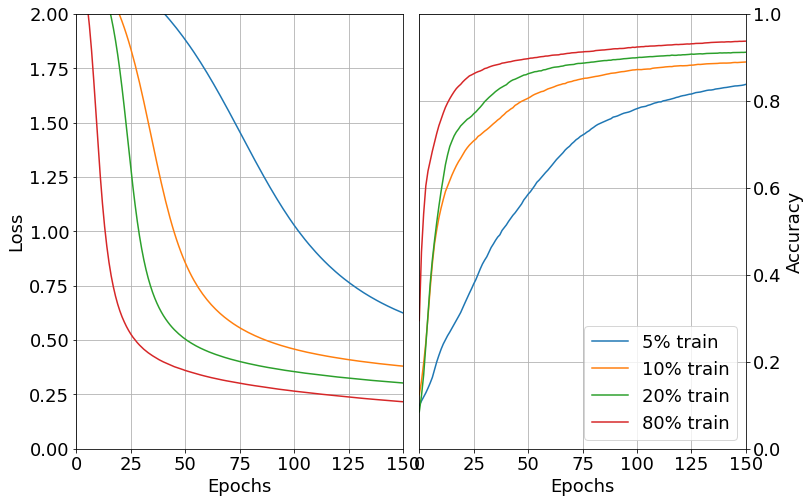

In [3]:
f = open('records/Reference_Hist.pickle', 'rb')
Ref_Hist = pickle.load(f)
f.close()

f = open('records/Teacher_Hist.pickle', 'rb')
Teacher_Hist05, Teacher_Hist10, Teacher_Hist20, _ = pickle.load(f)
f.close()

to_plot = [Teacher_Hist05, Teacher_Hist10, Teacher_Hist20, Ref_Hist]
labels = ['5% training data', '10% training data', '20% training data', '80% training data']
plot_results(to_plot, labels)

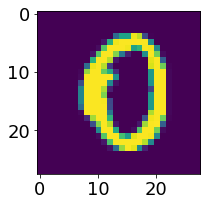

In [4]:
Aug = Augmenter(2)

x,_ = Data.get_test()
fig = plt.figure(figsize=(4,3))
x = np.reshape(x,np.shape(x)[:3])
x1 = x[0]
plt.imshow(x1)


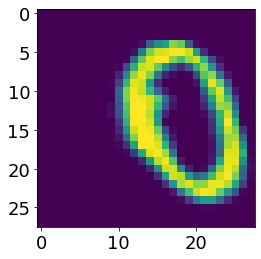

In [5]:
x2 = Aug.transform(x1)
plt.imshow(x2)

In [14]:
f = open('records/Student_Hist.pickle', 'rb')
Student_Hist10, Student_Hist10_noise, Student_Hist10_noise_ = pickle.load(f)
f.close()

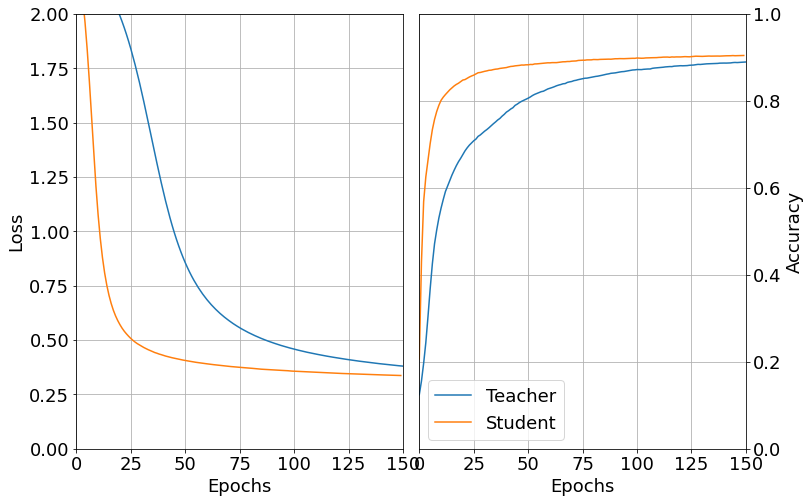

In [7]:
to_plot = [Teacher_Hist10, Student_Hist10]
labels = ['Teacher', 'Student']
# to_plot = [Ref_Hist, Teacher_Hist10, Student_Hist10]
# labels = ['Ref','Teacher', 'Student']
plot_results(to_plot, labels)

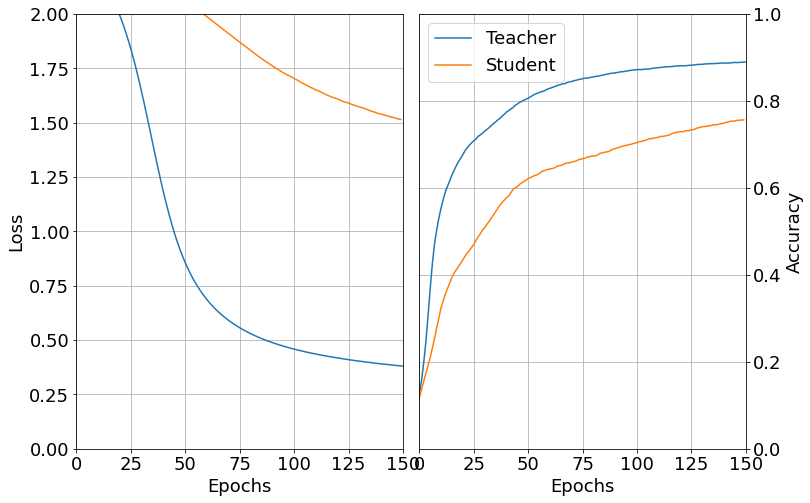

In [8]:
to_plot = [Teacher_Hist10, Student_Hist10_noise]
labels = ['Teacher', 'Student']
plot_results(to_plot, labels)

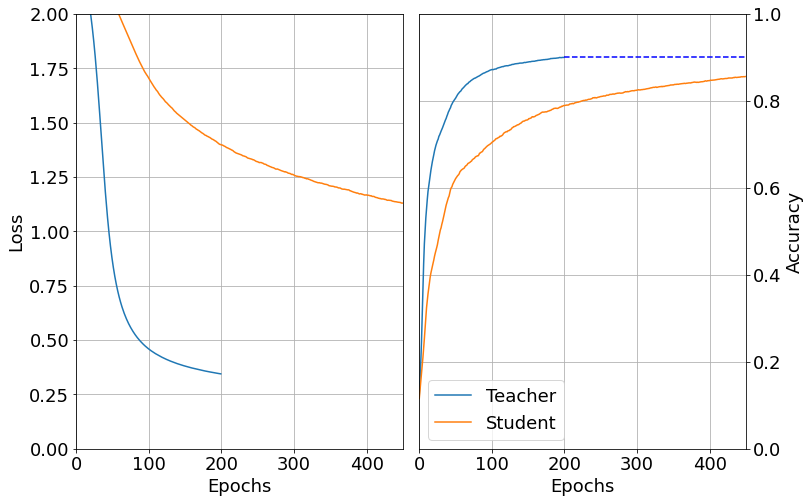

In [32]:
to_plot = [Teacher_Hist10, Student_Hist10_noise_]
labels = ['Teacher', 'Student']
plot_results(to_plot, labels, [450,2,1])
y = Teacher_Hist10['test_acc'][-1][-1]
plt.plot([200,500],[y,y], 'b--')